In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src

Mounted at /content/gdrive
/content/gdrive/My Drive/Code/GroupProjectDevops/log6309e-group/src


In [ ]:
input_file: str = '../data/BGL/BGL.log_structured.csv'
output_file_path: str = '../data/BGL/BGL-log.splitted.npz'

In [ ]:
df = pd.read_csv(input_file)

df['Time'] = pd.to_datetime(df['Time'], format="%Y-%m-%d-%H.%M.%S.%f")

df['IsAnomaly'] = df['Label'] != '-'
g = df.groupby([pd.Grouper(key='Time', freq='6H'), 'EventId'])
h = df.groupby([pd.Grouper(key='Time', freq='6H')])
anomaly_df = h.apply(lambda x: x.loc[:, 'IsAnomaly'].any()).reset_index()

count_df = g.apply(lambda x: x.shape[0]).reset_index()
count_df.rename({0:'count'}, axis=1, inplace=True)

anomaly_df.rename({0:'IsAnomaly'}, axis=1, inplace=True)
merged = pd.merge(anomaly_df, count_df, how='outer', on='Time')

event_count_vector = merged.pivot(index=["Time", 'IsAnomaly'],
                                  columns="EventId",
                                  values='count').fillna(0).drop(columns=[np.NaN])

In [ ]:
display(event_count_vector)

,EventId,01c4e373,02430fd4,0256fb0b,0315e48d,0328c31b,045f554d,04639923,04f5a2ae,0509d32d,05588c1a,...,f7c382bd,f80a5ed5,f97e57f1,f9df8a24,fac52822,fb1560b4,fb225cd2,fe297487,feaae979,ff52c40c
Time,IsAnomaly,,,,,,,,,,,,,,,,,,,,,
2005-06-03 12:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-03 18:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-04 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-04 06:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-06-04 12:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2005-11-17 06:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2005-11-17 12:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-11-17 18:00:00,True,0.0,2.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0,0.0


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = event_count_vector.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(event_count_vector.values, i)
                          for i in range(len(event_count_vector.columns))]

print(vif_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


      feature           VIF
0    01c4e373           inf
1    02430fd4  4.188162e+07
2    0256fb0b           inf
3    0315e48d           inf
4    0328c31b  9.395508e+06
..        ...           ...
344  fb1560b4  3.943215e+07
345  fb225cd2           inf
346  fe297487           inf
347  feaae979  2.555691e+03
348  ff52c40c  2.551506e+02

[349 rows x 2 columns]


In [ ]:
display(vif_data)

,feature,VIF
0,01c4e373,inf
1,02430fd4,4.188162e+07
2,0256fb0b,inf
3,0315e48d,inf
4,0328c31b,9.395508e+06
...,...,...
344,fb1560b4,3.943215e+07
345,fb225cd2,inf
346,fe297487,inf
347,feaae979,2.555691e+03


In [ ]:
vif_data_sorted = vif_data.sort_values(by=['VIF'])

Text(0.5, 1.0, 'VIF for each feature')

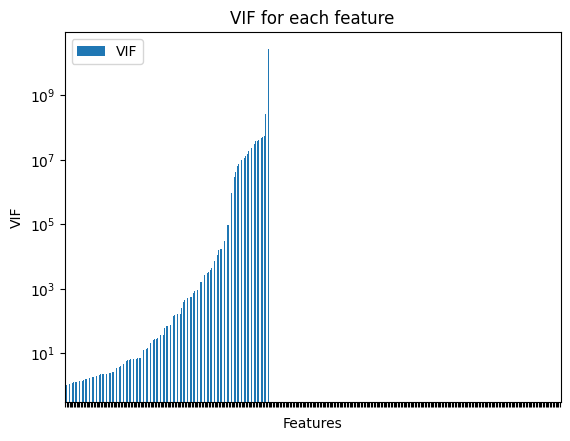

In [ ]:
plot = vif_data_sorted.plot(x='feature', y='VIF', kind='bar', logy=True)
plot.set_xticklabels([])
plot.set_xlabel('Features')
plot.set_ylabel('VIF')
plot.set_title('VIF for each feature')

In [ ]:
event_ids = event_count_vector.columns.to_numpy()

In [ ]:
event_ids_pd = pd.DataFrame(event_ids)
event_ids_pd.to_csv('../data/BGL/BGL.event_ids.csv')

In [ ]:
train, test = train_test_split(event_count_vector, test_size=0.2)

test_y = test.reset_index(level='IsAnomaly')['IsAnomaly'].to_numpy() * 1
train_y = train.reset_index(level='IsAnomaly')['IsAnomaly'].to_numpy() * 1
test_x = test.reset_index(level='IsAnomaly').drop(columns=['IsAnomaly']).to_numpy()
train_x = train.reset_index(level='IsAnomaly').drop(columns=['IsAnomaly']).to_numpy()

In [ ]:
display(train_x)

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
train_x.shape

(135, 349)

In [ ]:
X = event_count_vector.reset_index().drop(['Time', 'IsAnomaly'], axis=1).to_numpy()
display(X)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
y = event_count_vector.reset_index()['IsAnomaly'].to_numpy() * 1
display(y)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,

In [ ]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_l1 = model.transform(X)
X_l1.shape

(672, 59)

In [53]:
X_y = np.concatenate((X_l1, y.reshape(-1, 1)), axis=1)
train, test = train_test_split(X_y, test_size=0.2)
X_y.shape

(672, 60)

In [54]:
train_l1, test_l1 = train_test_split(X_y, test_size=0.2)

test_l1_y = test_l1[:, -1:]
train_l1_y = train_l1[:, -1:]
test_l1_x = test_l1[:, :-1]
train_l1_x = train_l1[:, :-1]

In [56]:
print(test_l1_y.shape)
print(train_l1_y.shape)
print(test_l1_x.shape)
print(train_l1_x.shape)

(135, 1)
(537, 1)
(135, 59)
(537, 59)


In [60]:
np.savez(output_file_path,
          x_train=train_x,
          y_train=train_y,
          x_test=test_x,
          y_test=test_y,
          x_train_l1=train_l1_x,
          y_train_l1=train_l1_y,
          x_test_l1=test_l1_x,
          y_test_l1=test_l1_y)